In [1]:
! pip install seaborn

In [4]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns
sns.set(color_codes=True) 

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('train.csv')
print(df.shape)

(1458644, 11)


In [6]:
df_t = pd.read_csv('test.csv')
print(df_t.shape)

(625134, 9)


In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

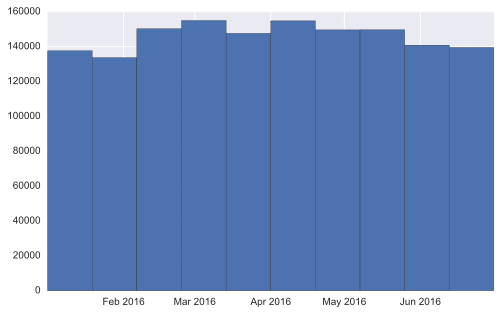

In [9]:
df.datetime = pd.to_datetime(df.pickup_datetime)
df.datetime.hist()

In [10]:
df['year'] = df.datetime.apply(lambda x: x.year)
df['month'] = df.datetime.apply(lambda x: x.month)
df['day'] = df.datetime.apply(lambda x: x.day)
df['hour'] = df.datetime.apply(lambda x: x.hour + x.minute/60)
df['weekday'] = df.datetime.apply(lambda x: x.weekday())

In [11]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,weekday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17.400000,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0.716667,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11.583333,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19.533333,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13.500000,5


In [12]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

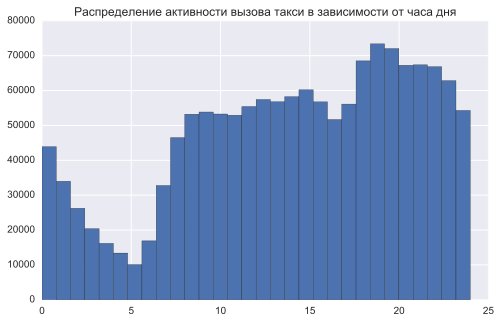

In [65]:
ax = df.hour.hist(bins = 30)
plt.title('Распределение активности вызова такси в зависимости от часа дня')

In [16]:
df_id = df.groupby(['vendor_id','month'])[['passenger_count']].sum().reset_index()

In [17]:
df_id

,vendor_id,month,passenger_count
0,1,1,132317
1,1,2,137212
2,1,3,149144
3,1,4,148755
4,1,5,147420
5,1,6,139457
6,2,1,252269
7,2,2,258473
8,2,3,276634
9,2,4,271151


In [18]:
df1 = df_id[(df_id['vendor_id']==1)]

In [19]:
df2 = df_id[(df_id['vendor_id']==2)]

In [20]:
trace0 = go.Scatter(
    x=df1.month,
    y=df1.passenger_count,
    name='vendor_id = 1'
)

trace1 = go.Scatter(
    x=df2.month,
    y=df2.passenger_count,
    name='vendor_id = 2'
)

data = [trace0, trace1]
layout = {'title': 'Количество пассажиров в месяц'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)

In [21]:
def haversine_np(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['dist'] = \
    haversine_np(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)

In [22]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,weekday,dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17.400000,0,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0.716667,6,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11.583333,1,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19.533333,2,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13.500000,5,1.187842


In [23]:
df['dist'].max()

1240.1295784391741

In [25]:
df3

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,weekday,dist
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,2016,5,7,18.966667,5,1240.129578


In [26]:
df3['pickup_longitude']

184925   -72.809669
Name: pickup_longitude, dtype: float64

In [27]:
df['velociti'] = df['dist'] /( df['trip_duration'] / 60 /60)

In [28]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,weekday,dist,velociti
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17.400000,0,1.497580,11.848984
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0.716667,6,1.804374,9.797504
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11.583333,1,6.381090,10.815406
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19.533333,2,1.484566,12.457894
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13.500000,5,1.187842,9.830418


In [ ]:
sns.jointplot(x='dist', y='trip_duration', 
              data=df, kind='scatter');
plt.title('Корреляция дистанции и времени поездки')

In [30]:
df['number of trips'] = 1
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,weekday,dist,velociti,number of trips
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17.400000,0,1.497580,11.848984,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0.716667,6,1.804374,9.797504,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11.583333,1,6.381090,10.815406,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19.533333,2,1.484566,12.457894,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13.500000,5,1.187842,9.830418,1


In [32]:
df_3 = df.groupby(['passenger_count'])[['number of trips']].sum().reset_index()
df_3

,passenger_count,number of trips
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


In [41]:
df4 = df_3.drop([0])
df4


,passenger_count,number of trips
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


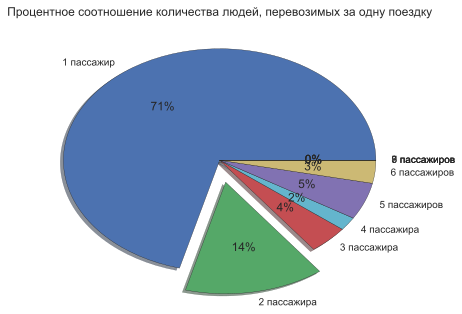

In [64]:
plt.figure(figsize=(7,5))
x = df4['number of trips']
labels = [ '1 пассажир', '2 пассажира', '3 пассажира', '4 пассажира', '5 пассажиров', '6 пассажиров', 
          '7 пассажиров', '8 пассажиров', '9 пассажиров']
explode = [0, 0.2, 0, 0, 0, 0, 0 ,0 ,0 ]

plt.pie(x, labels = labels, explode = explode, autopct = '%1.0f%%', shadow=True);
plt.title('Процентное соотношение количества людей, перевозимых за одну поездку')
plt.show()